In [1]:
#loading the dependencies
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import *
from tensorflow.keras import layers
from tensorflow import keras

In [2]:
movie=pd.read_csv('/kaggle/input/movielens-20m-dataset/movie.csv')
rating=pd.read_csv('/kaggle/input/movielens-20m-dataset/rating.csv')

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [5]:
print(movie.shape,rating.shape)

(27278, 3) (20000263, 4)


In [6]:
rating=rating[0:110000]

In [7]:
rating.shape

(110000, 4)

In [8]:
user_ids=rating.userId.unique().tolist()
user2user={x:i for i,x in enumerate(user_ids)}
userencodeuser={i:x for i,x in enumerate(user_ids)}

In [9]:
movie_ids=list(rating.movieId.unique())
movie2movie={x:i for i,x in enumerate(movie_ids)}
movieencodemovie={i:x for i,x in enumerate(movie_ids)}

In [10]:
rating['user']=rating.userId.map(user2user)
rating['movie']=rating.movieId.map(movie2movie)

In [11]:
rating.head()

,userId,movieId,rating,timestamp,user,movie
0,1,2,3.5,2005-04-02 23:53:47,0,0
1,1,29,3.5,2005-04-02 23:31:16,0,1
2,1,32,3.5,2005-04-02 23:33:39,0,2
3,1,47,3.5,2005-04-02 23:32:07,0,3
4,1,50,3.5,2005-04-02 23:29:40,0,4


In [12]:
min_rating=min(rating.rating)
min_rating

0.5

In [13]:
max_rating=max(rating.rating)
max_rating

5.0

In [14]:
print('No of users',len(user_ids))
print('No of movies',len(movie_ids))

No of users 751
No of movies 8864


In [15]:
#target 
y=rating.rating.values
y

array([3.5, 3.5, 3.5, ..., 4. , 4. , 5. ])

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
y=sc.fit_transform(y.reshape(-1,1))
y

array([[0.66666667],
       [0.66666667],
       [0.66666667],
       ...,
       [0.77777778],
       [0.77777778],
       [1.        ]])

In [17]:
x = rating[['user','movie']].values
x

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [750,   3],
       [750,   4],
       [750, 178]])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=True)
x_train

array([[ 339, 2112],
       [  53, 2285],
       [ 535, 2114],
       ...,
       [  51,  656],
       [ 560,  827],
       [ 689, 1739]])

In [19]:
y_train.shape

(99000, 1)

In [20]:
#defining the model
user_input=layers.Input(shape=[1])

In [21]:
user_embed = layers.Embedding(751,50,embeddings_initializer ="he_normal",embeddings_regularizer=keras.regularizers.l2(1e-6))(user_input)

In [22]:
user_vect=layers.Flatten()(user_embed)
user_vect

<KerasTensor: shape=(None, 50) dtype=float32 (created by layer 'flatten')>

In [23]:
movie_input=layers.Input(shape=[1])
movie_embed = layers.Embedding(8864,50,embeddings_initializer ="he_normal",embeddings_regularizer=keras.regularizers.l2(1e-6))(movie_input)
movie_vect=layers.Flatten()(movie_embed)

In [24]:
prod=layers.dot(inputs=[user_vect,movie_vect],axes=1)
prod

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dot')>

In [25]:
dense1=layers.Dense(150,activation='relu',kernel_initializer='he_normal')(prod)
dense1

<KerasTensor: shape=(None, 150) dtype=float32 (created by layer 'dense')>

In [26]:
dense2=layers.Dense(64,activation='relu',kernel_initializer='he_normal')(dense1)
dense3=layers.Dense(1,activation='relu')(dense2)

In [27]:
model=Model([user_input,movie_input],dense3)

In [28]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

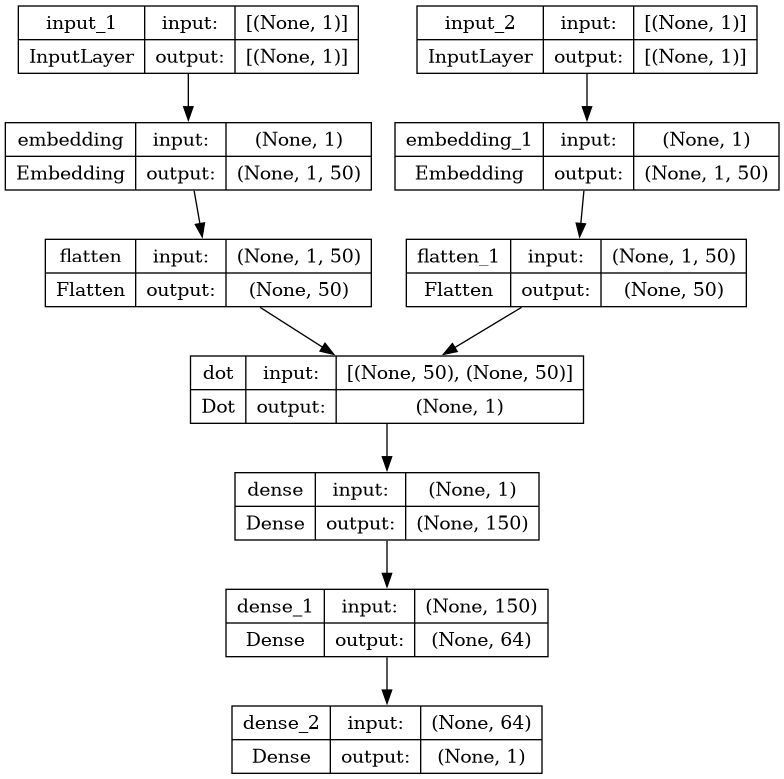

In [29]:
keras.utils.plot_model(model,show_shapes=True)

In [30]:
%%time
history = model.fit([x_train[:,0],x_train[:,1]],y_train,batch_size=32,epochs=10,verbose=1)

Epoch 1/10
3094/3094 [==============================] - 25s 8ms/step - loss: 0.0600
Epoch 2/10
3094/3094 [==============================] - 24s 8ms/step - loss: 0.0505
Epoch 3/10
3094/3094 [==============================] - 24s 8ms/step - loss: 0.0397
Epoch 4/10
3094/3094 [==============================] - 24s 8ms/step - loss: 0.0346
Epoch 5/10
3094/3094 [==============================] - 26s 8ms/step - loss: 0.0294
Epoch 6/10
3094/3094 [==============================] - 30s 10ms/step - loss: 0.0273
Epoch 7/10
3094/3094 [==============================] - 24s 8ms/step - loss: 0.0247
Epoch 8/10
3094/3094 [==============================] - 23s 8ms/step - loss: 0.0235
Epoch 9/10
3094/3094 [==============================] - 23s 7ms/step - loss: 0.0222
Epoch 10/10
3094/3094 [==============================] - 23s 7ms/step - loss: 0.0215
CPU times: user 8min 2s, sys: 36.5 s, total: 8min 38s
Wall time: 4min 5s


In [33]:
eval=model.evaluate([x_test[:,0],x_test[:,1]],y_test)

344/344 [==============================] - 1s 3ms/step - loss: 0.0935


In [34]:
eval

0.09352263808250427

Taking one random user_id and recommending some movies based on the rating given by the user

In [36]:
user_id=rating.userId.sample(1).iloc[0]
user_id

646

In [37]:
movies_watched_by_user=rating[rating.userId==user_id]
movies_watched_by_user

,userId,movieId,rating,timestamp,user,movie
92675,646,11,2.0,2000-06-28 16:45:03,645,386
92676,646,35,3.0,2000-06-28 16:45:39,645,3809
92677,646,39,3.0,2000-06-28 16:38:29,645,631
92678,646,49,4.0,2000-06-28 16:41:18,645,7031
92679,646,105,4.0,2000-06-28 16:49:24,645,431
...,...,...,...,...,...,...
92822,646,3685,3.0,2000-06-28 16:43:46,645,2368
92823,646,3699,5.0,2000-06-28 16:44:28,645,578
92824,646,3763,3.0,2000-06-28 16:20:13,645,2377
92825,646,3764,2.0,2000-06-28 16:26:02,645,2033


In [44]:
movies_not_watched=movie[~movie['movieId'].isin(movies_watched_by_user.movieId.values)]['movieId']

In [46]:
movies_not_watched.head()

0    1
1    2
2    3
3    4
4    5
Name: movieId, dtype: int64

In [49]:
movies_not_watched=list(set(movies_not_watched).intersection(set(movie2movie.keys())))

In [50]:
len(movies_not_watched)

8712

In [62]:
movies_not_watched_index=[[movie2movie.get(x)] for x in movies_not_watched]

In [64]:
user_index=user2user.get(user_id)
user_index

645

In [65]:
user_movie_array=np.hstack(([[user_index]]*len(movies_not_watched_index),movies_not_watched_index))
user_movie_array

array([[ 645,  227],
       [ 645,    0],
       [ 645,  175],
       ...,
       [ 645, 1027],
       [ 645, 5391],
       [ 645, 6532]])

In [71]:
ratings=model.predict([user_movie_array[:,0],user_movie_array[:,1]]).flatten()
ratings

273/273 [==============================] - 0s 2ms/step


array([0.33282864, 0.6326269 , 0.33010083, ..., 0.48801816, 0.33989614,
       0.3475331 ], dtype=float32)

In [86]:
top_rating_index=ratings.argsort()[-10:][::-1]

In [89]:
recommended_movies_ids= [movieencodemovie.get(movies_not_watched_index[x][0]) for x in top_rating_index]

In [90]:
recommended_movies_ids

[7153, 50, 1196, 1240, 318, 1610, 1967, 1293, 858, 237]

In [93]:
movies_watched_by_user

,userId,movieId,rating,timestamp,user,movie
92675,646,11,2.0,2000-06-28 16:45:03,645,386
92676,646,35,3.0,2000-06-28 16:45:39,645,3809
92677,646,39,3.0,2000-06-28 16:38:29,645,631
92678,646,49,4.0,2000-06-28 16:41:18,645,7031
92679,646,105,4.0,2000-06-28 16:49:24,645,431
...,...,...,...,...,...,...
92822,646,3685,3.0,2000-06-28 16:43:46,645,2368
92823,646,3699,5.0,2000-06-28 16:44:28,645,578
92824,646,3763,3.0,2000-06-28 16:20:13,645,2377
92825,646,3764,2.0,2000-06-28 16:26:02,645,2033


In [97]:
#movies with high rating from user
top_movies_user=(movies_watched_by_user.sort_values(by='rating',ascending=False).head(5).movieId.values)
top_movies_user

array([1674, 2022, 1197,  969, 1199])

In [101]:
movies_df  = movie[movie['movieId'].isin(top_movies_user)]
movies_df

,movieId,title,genres
952,969,"African Queen, The (1951)",Adventure|Comedy|Romance|War
1172,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
1174,1199,Brazil (1985),Fantasy|Sci-Fi
1617,1674,Witness (1985),Drama|Romance|Thriller
1938,2022,"Last Temptation of Christ, The (1988)",Drama


In [104]:
for row in movies_df.itertuples():
    print(row.title,':',row.genres)

African Queen, The (1951) : Adventure|Comedy|Romance|War
Princess Bride, The (1987) : Action|Adventure|Comedy|Fantasy|Romance
Brazil (1985) : Fantasy|Sci-Fi
Witness (1985) : Drama|Romance|Thriller
Last Temptation of Christ, The (1988) : Drama


In [107]:
recomended_movies=movie[movie.movieId.isin(recommended_movies_ids)]
recomended_movies

,movieId,title,genres
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
234,237,Forget Paris (1995),Comedy|Romance
315,318,"Shawshank Redemption, The (1994)",Crime|Drama
843,858,"Godfather, The (1972)",Crime|Drama
1171,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
1212,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller
1265,1293,Gandhi (1982),Drama
1557,1610,"Hunt for Red October, The (1990)",Action|Adventure|Thriller
1883,1967,Labyrinth (1986),Adventure|Fantasy|Musical
7041,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy


In [108]:
for row in recomended_movies.itertuples():
    print(row.title,':',row.genres)

Usual Suspects, The (1995) : Crime|Mystery|Thriller
Forget Paris (1995) : Comedy|Romance
Shawshank Redemption, The (1994) : Crime|Drama
Godfather, The (1972) : Crime|Drama
Star Wars: Episode V - The Empire Strikes Back (1980) : Action|Adventure|Sci-Fi
Terminator, The (1984) : Action|Sci-Fi|Thriller
Gandhi (1982) : Drama
Hunt for Red October, The (1990) : Action|Adventure|Thriller
Labyrinth (1986) : Adventure|Fantasy|Musical
Lord of the Rings: The Return of the King, The (2003) : Action|Adventure|Drama|Fantasy
